In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from codefiles.datagen import random_xy, x_plus_noise, data_3d
from codefiles.dataplot import plot_principal_components, plot_3d, plot_2d
# %matplotlib inline
%matplotlib notebook

## 3D Correlated Data
Now for the most interesting part! Let's use the PCA to actually reduce our data dimensionality (from 3D to 2D). First, generate 3D data: kind of thin surface with some noise.

<IPython.core.display.Javascript object>


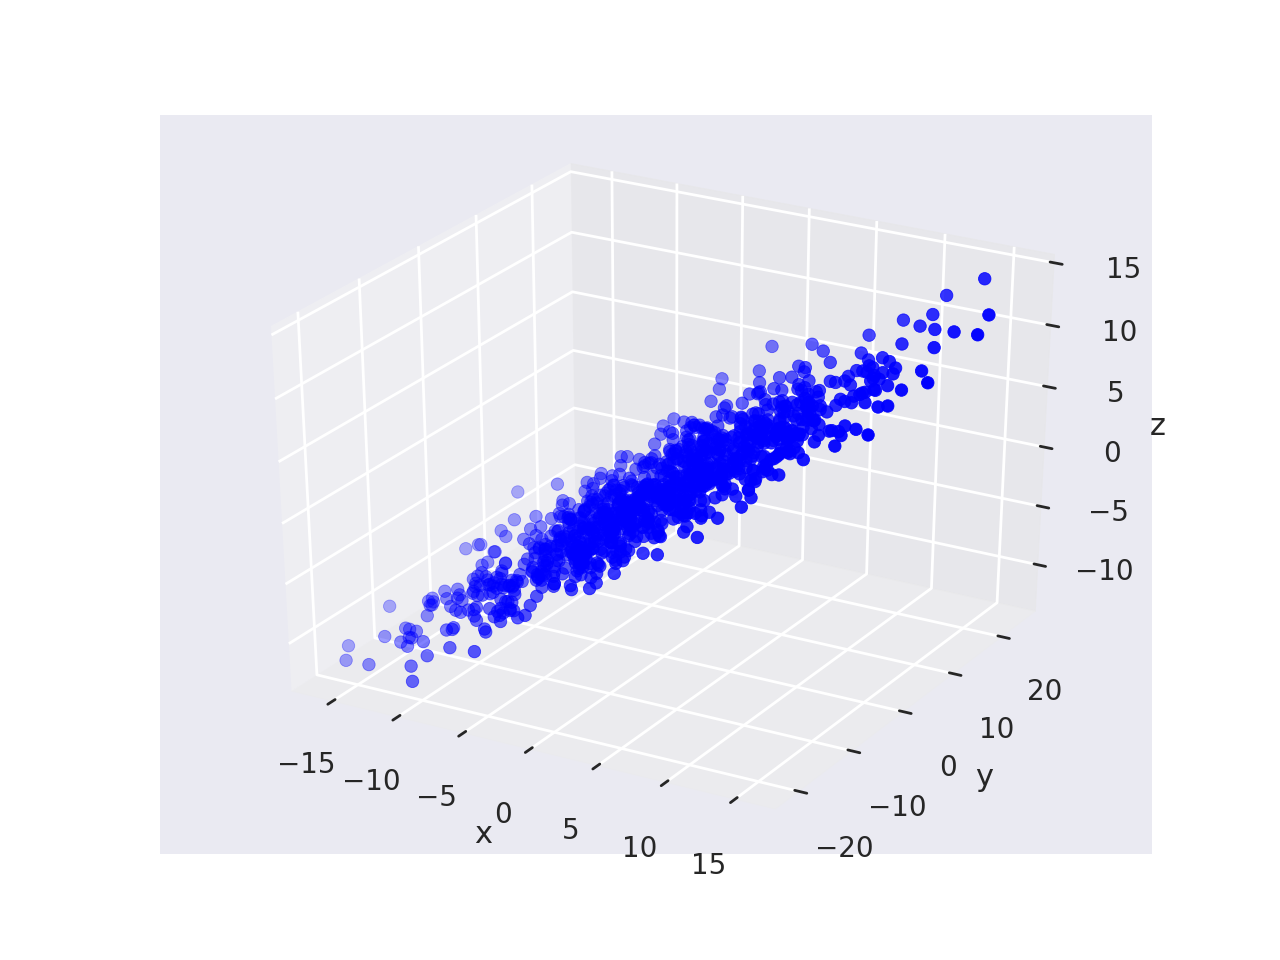

In [2]:
data_3D_corr = data_3d(num_points=1000, randomness=0.01, theta_x=30, theta_z=60)
plot_3d(data_3D_corr)

In [3]:
pca_3d = PCA()
pca_3d.fit(data_3D_corr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The variance corresponding to each principal component.

In [4]:
print('P.C. #0 explained variance: %0.7f' % pca_3d.explained_variance_ratio_[0])
print('P.C. #1 explained variance: %0.7f' % pca_3d.explained_variance_ratio_[1])
print('P.C. #2 explained variance: %0.7f' % pca_3d.explained_variance_ratio_[2])

P.C. #0 explained variance: 0.9610607
P.C. #1 explained variance: 0.0389383
P.C. #2 explained variance: 0.0000010


Check the **order of magnitude** of difference among the 3. At least one of them is not very informative... Let's **transform** our dataset with the PCA and see how it looks like.

In [5]:
data_flat = pca_3d.transform(data_3D_corr)
data_flat

array([[  4.76422322e+00,  -1.07920858e-01,   4.55813899e-03],
       [ -1.13971827e+00,   6.39064509e-01,  -7.64130567e-03],
       [ -4.53036189e-01,  -1.40482412e-02,   3.42740843e-03],
       ..., 
       [ -5.89395566e+00,   1.24322227e+00,   8.08376041e-03],
       [  1.41830702e+01,  -1.51250640e+00,   7.29085755e-03],
       [ -1.04665836e+01,  -9.11255193e-01,  -1.24748896e-02]])

We keep the 3D dimensionality with the three P.C. (P.C. 0, P.C. 1 and P.C. 2) but we see now the third column (P.C. 2) with magnitude values much lower than the other ones (P.C. 0 and P.C. 1).

<IPython.core.display.Javascript object>


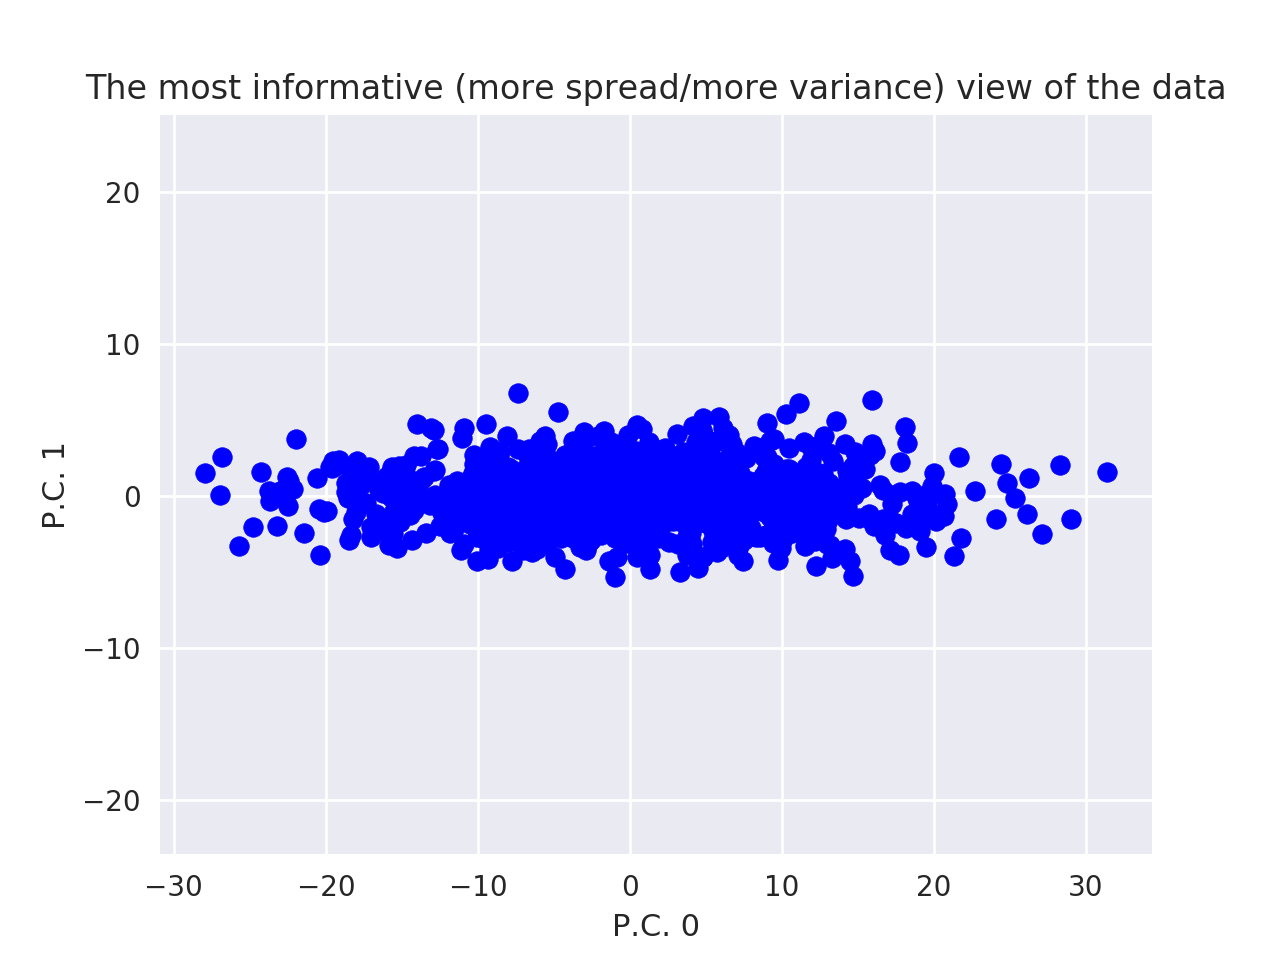

In [6]:
plot_principal_components(data_flat, x1=0, x2=1)
plt.axis('equal')
plt.title('The most informative (more spread/more variance) view of the data')
plt.show()

From above plot, P.C. 0 more informative than P.C. 1. And next, the comparison between P.C. 1 and P.C. 2 (the one we suspect it is not that informative).

<IPython.core.display.Javascript object>


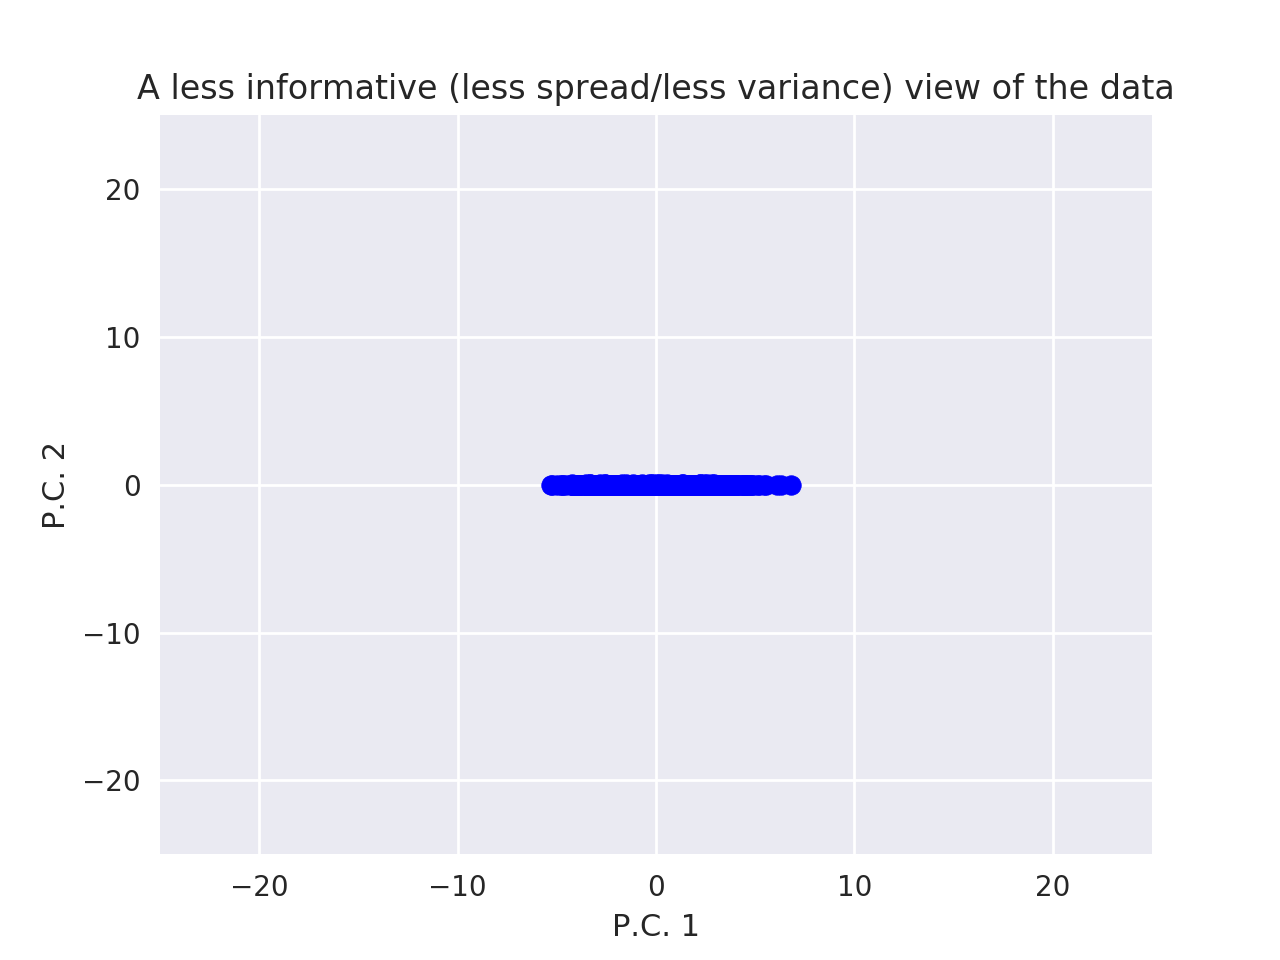

In [7]:
plot_principal_components(data_flat, x1=1, x2=2)
plt.title('A less informative (less spread/less variance) view of the data')
plt.xlim([-25,25])
plt.ylim([-25,25])
plt.show()

So, if we were in a process of dimensionality reduction then we would be able to extract two components without significant loss of information.

# Bonus - Just out of curiosity...
Up there we generated a 3D dataset with the following process:  
1) Correlated data on `x`, `y`, and `z` axis  

<IPython.core.display.Javascript object>


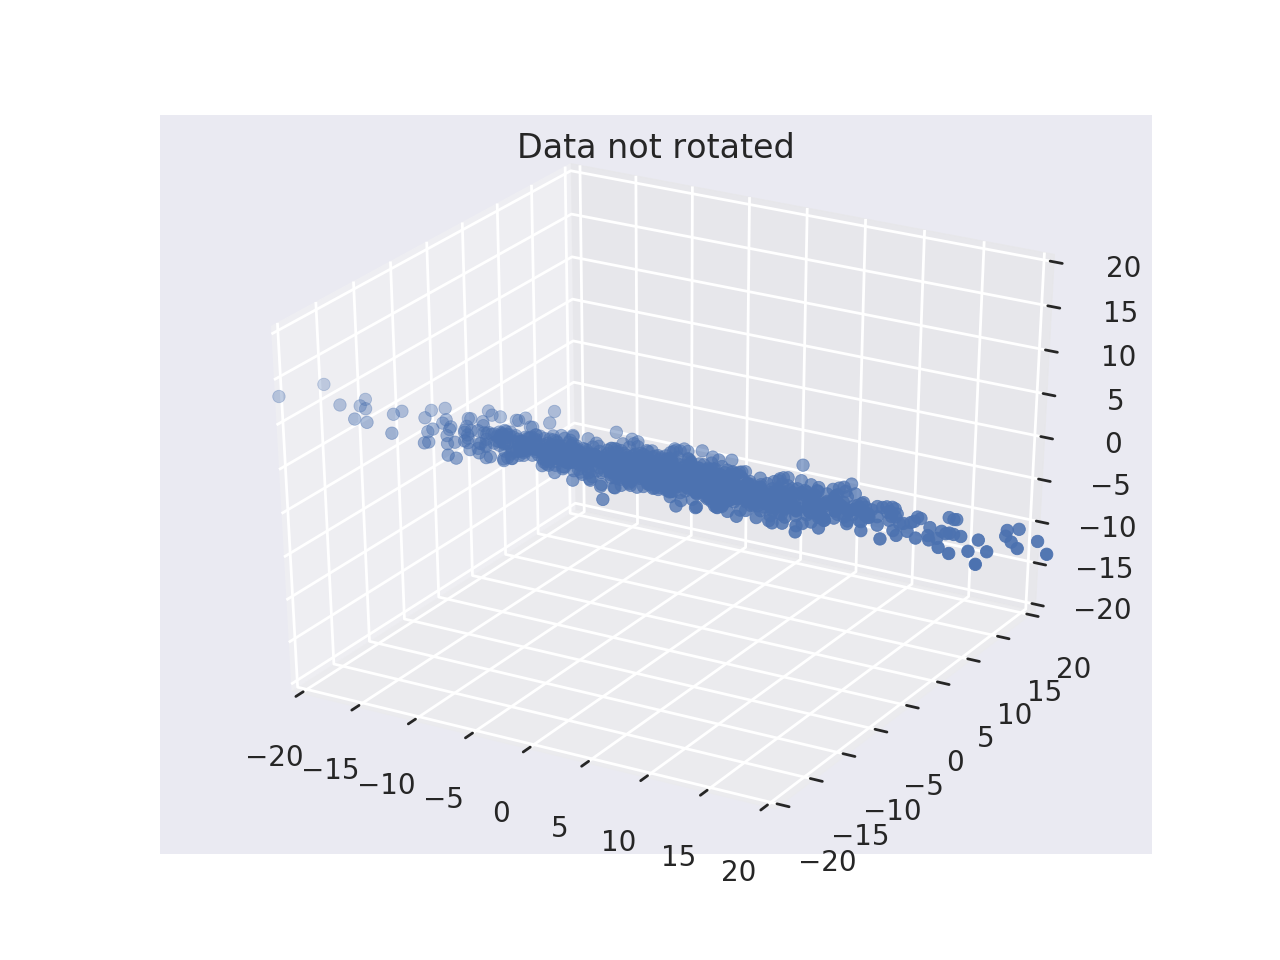

In [39]:
# generated not rotated dataset
data_3D_corr_0 = data_3d(num_points=1000, randomness=0.01, theta_x=0, theta_z=0)

# Plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = data_3D_corr_0['x'].values
ys = data_3D_corr_0['y'].values
zs = data_3D_corr_0['z'].values
ax.scatter(xs, ys, zs)
ax.set_xlim3d(-20, 20)
ax.set_ylim3d(-20, 20)
ax.set_zlim3d(-20, 20)
plt.title('Data not rotated')
plt.show()

2) Then we rotated the data around the `z` axis and the `x` axis, of `60` and `30` degrees respectively (by this order!) and we ended up with the first plot in this notebook (check it above).

In [40]:
from codefiles.datagen import _rot_mat_z, _rot_mat_x

# Rotation angles in degrees
theta_x = 30
theta_z = 60

# The rotation matrix is given by: Rot_x * Rot_z
rotation_matrix = np.dot(_rot_mat_x(theta=np.radians(theta_x)), _rot_mat_z(theta=np.radians(theta_z)))
rotation_matrix

array([[ 0.5      , -0.8660254,  0.       ],
       [ 0.75     ,  0.4330127, -0.5      ],
       [ 0.4330127,  0.25     ,  0.8660254]])

Now, just check the *transformation* the PCA did above to our dataset (we need to transpose it since it is the inverse transformation): 

In [41]:
pca_3d.components_.transpose()

array([[  5.01027838e-01,  -8.65431136e-01,   2.32096567e-04],
       [  7.49489373e-01,   4.33771043e-01,  -5.00108350e-01],
       [  4.32708661e-01,   2.50742159e-01,   8.65962807e-01]])

Looks familiar? :) The PCA just found what we've done! If we did not rotate our dataset, the rotation matrix would have been a 3x3 identity matrix